__Tutorial 1.1:__ What is PyTorch?

In [1]:
import torch

In [2]:
x = torch.empty(5, 3)
print(x)

tensor([[-8.3869e-32,  4.5646e-41, -8.3869e-32],
        [ 4.5646e-41,  1.8578e-01,  3.9155e-02],
        [ 4.7429e+30,  3.4545e+30,  1.7674e+28],
        [ 1.4586e-19,  8.0318e+20,  1.2737e-14],
        [ 1.3987e-19,  1.3556e-19,  1.8567e-01]])


In [3]:
x = torch.rand(5, 3)
print(x)

tensor([[0.8083, 0.1826, 0.7592],
        [0.9429, 0.1650, 0.7174],
        [0.4064, 0.3628, 0.4225],
        [0.5400, 0.8182, 0.1840],
        [0.6889, 0.7684, 0.2386]])


In [4]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [5]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [6]:
x = x.new_ones(5, 3, dtype=torch.double)
print(x)

x = torch.randn_like(x, dtype=torch.float)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.0774,  0.2110, -0.8981],
        [ 1.0147,  0.3919,  0.7950],
        [ 0.8606, -0.2439,  0.1161],
        [-0.0763,  1.0728, -1.5072],
        [ 2.5616, -0.7264, -0.1825]])


In [7]:
print(x.size())

torch.Size([5, 3])


In [8]:
y = torch.rand(5, 3)
print(x + y)
print(torch.add(x, y))

tensor([[ 0.3757,  0.7827, -0.3953],
        [ 1.6262,  0.6534,  0.9997],
        [ 1.6346, -0.1325,  0.7576],
        [ 0.5342,  2.0556, -0.9797],
        [ 3.5223, -0.2761,  0.6707]])
tensor([[ 0.3757,  0.7827, -0.3953],
        [ 1.6262,  0.6534,  0.9997],
        [ 1.6346, -0.1325,  0.7576],
        [ 0.5342,  2.0556, -0.9797],
        [ 3.5223, -0.2761,  0.6707]])


In [9]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)

tensor([[ 0.3757,  0.7827, -0.3953],
        [ 1.6262,  0.6534,  0.9997],
        [ 1.6346, -0.1325,  0.7576],
        [ 0.5342,  2.0556, -0.9797],
        [ 3.5223, -0.2761,  0.6707]])


In [10]:
# In-place addition
y.add_(x)
print(y)

tensor([[ 0.3757,  0.7827, -0.3953],
        [ 1.6262,  0.6534,  0.9997],
        [ 1.6346, -0.1325,  0.7576],
        [ 0.5342,  2.0556, -0.9797],
        [ 3.5223, -0.2761,  0.6707]])


In [11]:
print(x[:, 1])

tensor([ 0.2110,  0.3919, -0.2439,  1.0728, -0.7264])


In [12]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [13]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([-0.7379])
-0.7379059195518494


__Tutorial 1.2:__ NumPy Bridge

In [14]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [15]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1.]


In [16]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [17]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


In [18]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    y = torch.ones_like(x, device=device)
    x = x.to(device)
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))
else:
    print("CUDA is unavailable!")

tensor([0.2621], device='cuda:0')
tensor([0.2621], dtype=torch.float64)


__Tutorial 2.1:__ Autograd: Automatic Differentiation

In [19]:
import torch

In [20]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [21]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [22]:
print(y.grad_fn)

In [23]:
z = y * y * 3
out = z.mean()
print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward1>)


In [24]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True) # Recall "_" changes in-place
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


In [25]:
out.backward()

In [26]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [27]:
x = torch.rand(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2
        
print(y)

tensor([1391.7701, 1137.9813,  196.8256], grad_fn=<MulBackward0>)


In [28]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


In [29]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


__Tutorial 3.1:__ Neural Networks

In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [31]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [32]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.1129, -0.0598, -0.0642, -0.0552, -0.1020, -0.0720,  0.0291,  0.0150,
          0.1412,  0.0345]], grad_fn=<AddmmBackward>)


In [33]:
net.zero_grad()
out.backward(torch.randn(1, 10))

Recap:

* __torch.Tensor__ - A multi-dimensional array with support for autograd operations like backward(). Also holds the gradient w.r.t. the tensor.
* __nn.Module__ - Neural network module. Convenient way of encapsulating parameters, with helpers for moving them to GPU, exporting, loading, etc.
* __nn.Parameter__ - A kind of Tensor, that is automatically registered as a parameter when assigned as an attribute to a Module.
* __autograd.Function__ - Implements forward and backward definitions of an autograd operation. Every Tensor operation creates at least a single Function node that connects to functions that created a Tensor and encodes its history.

__Tutorial 3.2:__ Loss Function

In [34]:
output = net(input)
target = torch.randn(10)
target = target.view(1, -1)
criterion = nn.MSELoss() # mean-squared error

loss = criterion(output, target)
print(loss)

tensor(0.4251, grad_fn=<MseLossBackward>)


In [35]:
print(loss.grad_fn) # MSELoss
print(loss.grad_fn.next_functions[0][0]) # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) # ReLU

__Tutorial 3.3:__ Backprop

In [36]:
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0024, -0.0146, -0.0007,  0.0025,  0.0094, -0.0079])


__Tutorial 3.4:__ Updating Weights

In [37]:
learning_rate = 0.01
for f in net.parameters(): # (manual) Stochastic Gradient Descent
    f.data.sub_(f.grad.data * learning_rate)

In [38]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in training loop:
optimizer.zero_grad()
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() # (torch.optim) Stochastic Gradient Descent

__Tutorial 4.1:__ Training a Classifier

In [39]:
import torch
import torchvision
import torchvision.transforms as transforms

In [40]:
# Load and normalize CIFAR 10 dataset
# These are 32x32 RGB images of:
#   airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                         shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                        shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


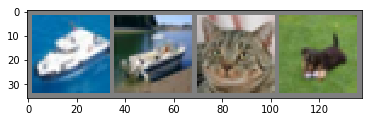

 ship  ship   cat   dog


In [41]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join("%5s" % classes[labels[j]] for j in range(4)))

__Tutorial 4.2:__ Define a Convolutional Neural Network

In [42]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

__Tutorial 4.3:__ Define a Loss function and Optimizer

In [43]:
import torch.optim as optim

if torch.cuda.is_available():
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    net.to(device)

# Classification Cross-Entropy and SGD with momentum
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

__Tutorial 4.4:__ Training the Network

In [44]:
from time import time
start = time()

for epoch in range(5): # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training in {:.2f} s'.format(time()-start))

if torch.cuda.is_available():
    net.to("cpu")

[1,  2000] loss: 2.221
[1,  4000] loss: 1.890
[1,  6000] loss: 1.671
[1,  8000] loss: 1.574
[1, 10000] loss: 1.553
[1, 12000] loss: 1.497
[2,  2000] loss: 1.432
[2,  4000] loss: 1.410
[2,  6000] loss: 1.373
[2,  8000] loss: 1.349
[2, 10000] loss: 1.347
[2, 12000] loss: 1.317
[3,  2000] loss: 1.274
[3,  4000] loss: 1.224
[3,  6000] loss: 1.249
[3,  8000] loss: 1.237
[3, 10000] loss: 1.227
[3, 12000] loss: 1.216
[4,  2000] loss: 1.163
[4,  4000] loss: 1.158
[4,  6000] loss: 1.127
[4,  8000] loss: 1.168
[4, 10000] loss: 1.161
[4, 12000] loss: 1.150
[5,  2000] loss: 1.065
[5,  4000] loss: 1.066
[5,  6000] loss: 1.085
[5,  8000] loss: 1.100
[5, 10000] loss: 1.108
[5, 12000] loss: 1.078
Finished Training in 98.48 s


__Tutorial 4.5:__ Test the Network on the Test Set

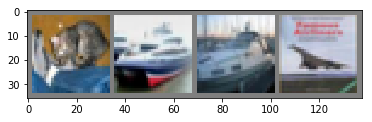

GroundTruth:    cat  ship  ship plane


In [45]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join("%5s" % classes[labels[j]] for j in range(4)))

In [46]:
output = net(images)

_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join("%5s" % classes[predicted[j]] for j in range(4)))

Predicted:   deer  ship  ship truck


In [47]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Random guessing here is 10% accuracy
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 59 %


In [48]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


# Check per-class accuracy
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 62 %
Accuracy of   car : 65 %
Accuracy of  bird : 47 %
Accuracy of   cat : 43 %
Accuracy of  deer : 55 %
Accuracy of   dog : 52 %
Accuracy of  frog : 71 %
Accuracy of horse : 58 %
Accuracy of  ship : 69 %
Accuracy of truck : 68 %


__Tutorial 4.6:__ Training on GPU

In [49]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

cuda:0


In [50]:
net.to(device)

inputs, labels = inputs.to(device), labels.to(device)